In [4]:
import tifffile
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import pyvista as pv
import cv2 as cv
import numpy as np
import itertools
import scipy
import time
import pandas as pd
from sklearn.mixture import GaussianMixture as GMM
from skimage.segmentation import mark_boundaries, slic
from scipy.ndimage import generic_filter
from cv2 import fastNlMeansDenoising,fastNlMeansDenoisingMulti, medianBlur
from skimage import morphology, transform
from skimage.measure import regionprops
import pyvista
from scipy.linalg import orthogonal_procrustes
import math
import warnings

D:\Software\Anaconda\envs\MachineLearning\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [5]:
def extract_properties (regions):
    
    properties = pd.DataFrame(columns= ['area','centroid','coords','label',
                                        'transformed_coord','matched_high_centroid',
                                        'matched_high_label', 'distance_transformed_high_res'])
    
    for c in properties.columns[:-4]:
        print (c)
        
        _vals = []
        for r in regions:
            try:
                val = eval('r.{}'.format(c))
                
            except:
                val = 0
                
            _vals.append(val)
            
        code = 'properties.{} = _vals'.format(c)
        exec(code)

    return properties

In [6]:
path = 'data/High_res_mask.tif'
high_res = tifffile.imread(path)

labelled_high_res = morphology.label(high_res, connectivity=2, background=1)
regions_high_res = regionprops(labelled_high_res)

# properties data frame (pdf)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    pdf_high =extract_properties(regions_high_res).drop(columns = ['transformed_coord','matched_high_centroid', 
                                                                   'matched_high_label','distance_transformed_high_res'])
    
print ('High Resolution shape is ',high_res.shape)

pdf_high = pdf_high.drop(index=0)

area
centroid
coords
label
High Resolution shape is  (663, 1206, 770)


In [48]:
all_bubbles_volume = pdf_high.area.sum()
all_bubbles_number = len(pdf_high.area)
lost_bubbles_number = []
lost_bubbles_volume = []
scales = []
for scale in range (2,11):
    scales.append(scale*12)
    lost_bubbles_number.append(100*len(pdf_high[pdf_high.area / scale**3 < 1]['area']) / all_bubbles_number)
    lost_bubbles_volume.append((pdf_high[pdf_high.area / scale**3 < 1]['area'].sum()*scale**3) / all_bubbles_volume)

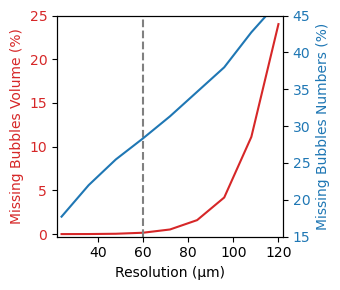

In [64]:




fig, ax1 = plt.subplots(figsize=(3.5, 3))
color = 'tab:red'
ax1.set_xlabel('Resolution (µm)', color='black')
ax1.set_ylabel('Missing Bubbles Volume (%)', color=color)
ax1.plot(scales,lost_bubbles_volume, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlim(22,122)
ax1.set_ylim(-0.3,25)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Missing Bubbles Numbers (%)', color=color)  # we already handled the x-label with ax1
ax2.plot(scales,lost_bubbles_number, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(15,45)

# Adding a dashed line at x = 60
ax1.axvline(x=60, linestyle='--', color='gray')  # Vertical dashed line at x = 60

fig.tight_layout()# otherwise the right y-label is slightly clipped
plt.savefig('Downsampling_Effect.pdf', dpi=400)
plt.show()